In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('./data/using_data.csv')
product_info = pd.read_csv('./data/product_info.csv')

target_df =  pd.read_excel('/Users/seokholee/lsh/Project/유통데이터 활용 경진대회/제출서류/[데이터 모델링 부문] 답안지.xlsx')
targets = target_df[~target_df['Unnamed: 3'].isna()]['Unnamed: 3'][1:].tolist()
targets_name = target_df[~target_df['Unnamed: 3'].isna()]['Unnamed: 4'][1:].tolist()

In [4]:
for code in df['상품 바코드'].iloc[:5]:
    print(code)
    for idx, row in product_info[product_info['GTIN'] == code].iterrows():
        print(row)
    
    print()
    print()
    print('-'*10)

8801007266435.0
GTIN               8801007266435
순중량(Net Weight)            100.0
상품 형태                        봉지형
상품분류명_0                     가공식품
상품분류명_1                      조미료
상품분류명_2                    종합조미료
상품분류명_3                    기타조미료
국가정보_원산지                    대한민국
국가정보_제조국                     NaN
회사이름                 씨제이제일제당주식회사
Name: 1260, dtype: object


----------
18801039202378.0


----------
8809198673605.0
GTIN                 8809198673605
순중량(Net Weight)                NaN
상품 형태                          봉지형
상품분류명_0                       일상용품
상품분류명_1                       주방용품
상품분류명_2                     주방일회용품
상품분류명_3                 일회용숟가락/젓가락
국가정보_원산지                       베트남
국가정보_제조국                       NaN
회사이름               HOALU HANDCRAFT
Name: 2700, dtype: object


----------
8801077334102.0
GTIN               8801077334102
순중량(Net Weight)            800.0
상품 형태                       육면체형
상품분류명_0                     가공식품
상품분류명_1                  어육/연식품류

In [5]:
df.head()

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
0,2021-01-04,매출,37542,4,EA,100g*1,1,8.801007e+12,다시다)쇠골드명품100g,NaN,NaN
1,2021-01-04,매출,37542,2,BX,12입,12,1.880104e+13,사조]해표식용유<1.8L>,NaN,NaN
2,2021-01-04,매출,37542,1,EA,1입,1,8.809199e+12,젓가락]키친센스 나무<250p>,NaN,NaN
3,2021-01-04,매출,37542,1,EA,50g*16*1,1,8.801077e+12,소세지 천하장사800g,NaN,NaN
4,2021-01-04,매출,37542,3,EA,10입,1,8.801045e+12,오뚜기]옛날자른당면<1kg >,NaN,NaN


In [6]:
product_info.head()

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
0,8801166222419,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,대한민국,NaN,유한킴벌리(주)
1,8809016360267,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,엘지유니참 주식회사
2,8809016360274,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,엘지유니참 주식회사
3,8801166230940,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,유한킴벌리 본사
4,8801328320045,NaN,원통형,의약품/의료기기,의약외품,해충 방역용 제제,방역용살충제,대한민국,NaN,(주)지에스켐


### 상품 바코드 그룹화


In [7]:
code_counts = df['상품 바코드'].value_counts()

<AxesSubplot:>

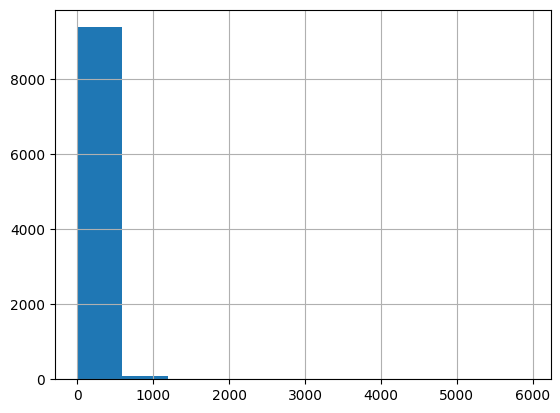

In [8]:
code_counts.hist()

In [9]:
code_counts.describe()

count    9479.000000
mean       55.011605
std       160.402702
min         1.000000
25%         4.000000
50%        13.000000
75%        46.000000
max      5941.000000
Name: 상품 바코드, dtype: float64

In [10]:
code_counts.index

Float64Index([ 8809274240219.0,  8809274240066.0,  8801043014793.0,
               8808244208044.0,  1701001530617.0,  1701001521813.0,
               1701000822379.0,  8801043014847.0,  1701001591298.0,
              18801551302112.0,
              ...
              18801252025129.0,  8808284700058.0,  8803733075671.0,
               8809254927109.0,  1701001044008.0, 18801252022104.0,
               8801111911689.0, 18801046890995.0,  8809086180093.0,
               1701003976680.0],
             dtype='float64', length=9479)

In [11]:
 max_code = code_counts[code_counts==code_counts.max()].index[0]
 min_code = code_counts[code_counts==code_counts.min()].index[0]

In [12]:
 product_info[product_info['GTIN'] == int(max_code)]

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
1774,8809274240219,2000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,(주)동천수 가야산샘물


In [13]:
def getProductTrade(code, only_sales = True):
    
    result = df[df['상품 바코드'] == code]

    if only_sales:
        result = result[result['구분'] == '매출']

    return result

In [14]:
def getProductInfo(code):

    result = product_info[product_info['GTIN'] == int(code)]

    return result

In [15]:
best = getProductTrade(max_code)

<AxesSubplot:xlabel='판매일'>

/Users/seokholee/opt/anaconda3/envs/ds_study/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  func(*args, **kwargs)
/Users/seokholee/opt/anaconda3/envs/ds_study/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from current font.
  func(*args, **kwargs)
/Users/seokholee/opt/anaconda3/envs/ds_study/lib/python3.7/site-packages/IPython/core/events.py:89: UserWarning: Glyph 51068 (\N{HANGUL SYLLABLE IL}) missing from current font.
  func(*args, **kwargs)
/Users/seokholee/opt/anaconda3/envs/ds_study/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54032 (\N{HANGUL SYLLABLE PAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/seokholee/opt/anaconda3/envs/ds_study/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47588 (\N{HANGUL SYLLABLE MAE}) missing from c

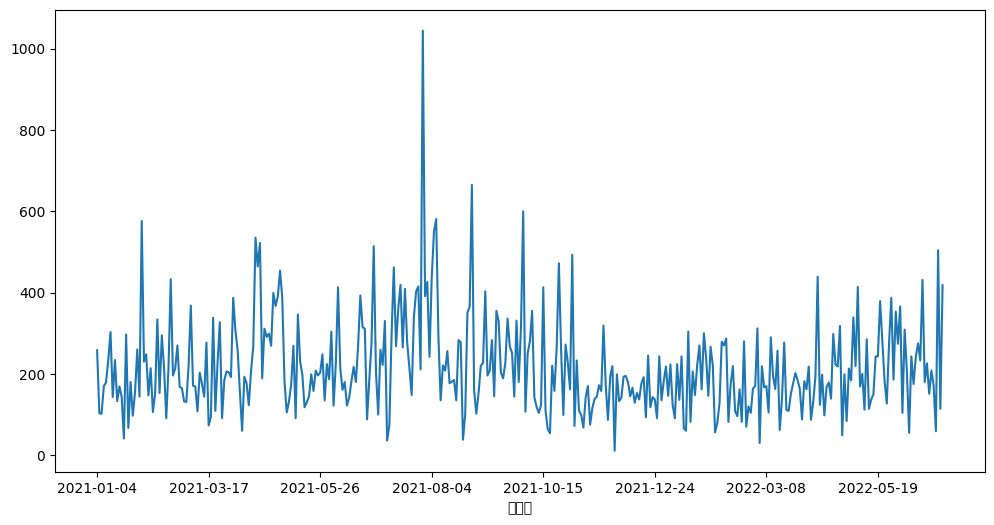

In [16]:
best.groupby('판매일')['판매수량'].sum().plot(figsize=(12,6))

In [17]:
target = getProductInfo(max_code)

In [18]:
product_info.head()

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
0,8801166222419,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,대한민국,NaN,유한킴벌리(주)
1,8809016360267,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,엘지유니참 주식회사
2,8809016360274,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,엘지유니참 주식회사
3,8801166230940,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,유한킴벌리 본사
4,8801328320045,NaN,원통형,의약품/의료기기,의약외품,해충 방역용 제제,방역용살충제,대한민국,NaN,(주)지에스켐


In [19]:
cate1 = target['상품분류명_0'].iloc[0]
cate2 = target['상품분류명_1'].iloc[0]
cate3 = target['상품분류명_2'].iloc[0]
cate4 = target['상품분류명_3'].iloc[0]

flag = (product_info['상품분류명_0'] == cate1) & (product_info['상품분류명_1'] == cate2) & (product_info['상품분류명_2'] == cate3) & (product_info['상품분류명_3'] == cate4)

product_info[flag]
        

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
843,8801056070090,2000.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,산수음료(주)
877,8801056085407,154.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,씨에이치음료(주)
899,8809274240066,188.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,유한회사 가야산샘물
1208,8801043020480,12000.0,병형,가공식품,음료류,생수,일반생수,중국,NaN,주식회사 농심
1209,8808244208044,12000.0,병형,가공식품,음료류,생수,일반생수,대한민국,NaN,제주특별자치도개발공사
1528,8808244101086,10000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,제주특별자치도개발공사
1767,8808244208013,10000.0,기타유형,가공식품,음료류,생수,일반생수,NaN,대한민국,제주특별자치도개발공사
1770,8801043022798,10000.0,기타유형,가공식품,음료류,생수,일반생수,NaN,대한민국,주식회사 농심
1773,8801128945646,12000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,(주)지리산산청샘물
1774,8809274240219,2000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,(주)동천수 가야산샘물


In [20]:
len(product_info['상품분류명_0'].value_counts()), len(product_info['상품분류명_1'].value_counts()), len(product_info['상품분류명_2'].value_counts()), len(product_info['상품분류명_3'].value_counts())

(9, 53, 151, 427)

In [21]:
product_info['상품분류명_3'].value_counts()

스낵         171
사탕          96
믹스커피        78
용기라면        77
즉석 죽/밥류     73
          ... 
콩가루          1
쌀국수          1
곰솥/들통        1
헤어케어소품       1
밴드스타킹        1
Name: 상품분류명_3, Length: 427, dtype: int64

In [22]:
df_lst = []
for target_code in targets:
    df_lst.append(getProductTrade(int(target_code)))

In [23]:
target_1 = df_lst[0]

In [24]:
target_1[target_1['구분'] == '매출']

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
133,2021-01-04,매출,37575,3,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
205,2021-01-04,매출,37611,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
620,2021-01-04,매출,37741,5,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
664,2021-01-04,매출,377-65,15,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
665,2021-01-04,매출,37767,160,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
521700,2022-07-01,매출,37928,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
521719,2022-07-01,매출,37930,3,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
521864,2022-07-01,매출,38004,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN
521899,2022-07-01,매출,38039,10,CS,6입,6,8.809274e+12,가야산천년수<2L*6>,NaN,NaN


In [25]:
def getSameCategory(code, searching_level = 4):

    target_info = getProductInfo(code)

    if searching_level == 1 :
        flag = product_info['상품분류명_0'] == target_info['상품분류명_0'].iloc[0]
   
    elif searching_level == 2 :
        flag = (product_info['상품분류명_0'] == target_info['상품분류명_0'].iloc[0]) & (product_info['상품분류명_1'] == target_info['상품분류명_1'].iloc[0])

    elif searching_level == 3 :
        flag = (product_info['상품분류명_0'] == target_info['상품분류명_0'].iloc[0]) & (product_info['상품분류명_1'] == target_info['상품분류명_1'].iloc[0]) & (product_info['상품분류명_2'] == target_info['상품분류명_2'].iloc[0])

    elif searching_level == 4 :
        flag = (product_info['상품분류명_0'] == target_info['상품분류명_0'].iloc[0]) & (product_info['상품분류명_1'] == target_info['상품분류명_1'].iloc[0]) & (product_info['상품분류명_2'] == target_info['상품분류명_2'].iloc[0]) & (product_info['상품분류명_3'] == target_info['상품분류명_3'].iloc[0])

    else:
        return '상품분류는 1~4만 선택가능합니다.'

    return product_info[flag]


In [328]:
item_codes = getSameCategory(targets[0])['GTIN']

In [329]:
df.head()

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
0,2021-01-04,매출,37542,4,EA,100g*1,1,8.801007e+12,다시다)쇠골드명품100g,NaN,NaN
1,2021-01-04,매출,37542,2,BX,12입,12,1.880104e+13,사조]해표식용유<1.8L>,NaN,NaN
2,2021-01-04,매출,37542,1,EA,1입,1,8.809199e+12,젓가락]키친센스 나무<250p>,NaN,NaN
3,2021-01-04,매출,37542,1,EA,50g*16*1,1,8.801077e+12,소세지 천하장사800g,NaN,NaN
4,2021-01-04,매출,37542,3,EA,10입,1,8.801045e+12,오뚜기]옛날자른당면<1kg >,NaN,NaN


In [333]:
print(f" TAGET 1 : {df[df['상품 바코드'] == int(targets[0])]['판매일'].max()} / {df[df['상품 바코드'] == int(targets[0])]['판매일'].min()}")
print(f" TAGET 2 : {df[df['상품 바코드'] == int(targets[1])]['판매일'].max()} / {df[df['상품 바코드'] == int(targets[1])]['판매일'].min()}")

for code in item_codes:
    tmp = df[df['상품 바코드'] == int(code)]
    print(f"MAX : {tmp['판매일'].max()} / MIN : {tmp['판매일'].min()}")

 TAGET 1 : 2022-07-01 / 2021-01-04
 TAGET 2 : 2022-07-01 / 2021-01-04
MAX : 2022-06-22 / MIN : 2022-02-11
MAX : 2022-06-29 / MIN : 2021-01-04
MAX : 2022-06-22 / MIN : 2021-01-04
MAX : 2022-07-01 / MIN : 2021-01-04
MAX : 2022-07-01 / MIN : 2021-01-04
MAX : 2022-06-29 / MIN : 2022-04-19
MAX : 2022-06-29 / MIN : 2021-01-04
MAX : 2022-07-01 / MIN : 2021-01-14
MAX : 2022-04-21 / MIN : 2021-03-18
MAX : 2022-07-01 / MIN : 2021-01-04


In [26]:
getSameCategory(targets[0])

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
843,8801056070090,2000.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,산수음료(주)
877,8801056085407,154.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,씨에이치음료(주)
899,8809274240066,188.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,유한회사 가야산샘물
1208,8801043020480,12000.0,병형,가공식품,음료류,생수,일반생수,중국,NaN,주식회사 농심
1209,8808244208044,12000.0,병형,가공식품,음료류,생수,일반생수,대한민국,NaN,제주특별자치도개발공사
1528,8808244101086,10000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,제주특별자치도개발공사
1767,8808244208013,10000.0,기타유형,가공식품,음료류,생수,일반생수,NaN,대한민국,제주특별자치도개발공사
1770,8801043022798,10000.0,기타유형,가공식품,음료류,생수,일반생수,NaN,대한민국,주식회사 농심
1773,8801128945646,12000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,(주)지리산산청샘물
1774,8809274240219,2000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,(주)동천수 가야산샘물


In [27]:
getSameCategory(targets[1])

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
843,8801056070090,2000.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,산수음료(주)
877,8801056085407,154.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,씨에이치음료(주)
899,8809274240066,188.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,유한회사 가야산샘물
1208,8801043020480,12000.0,병형,가공식품,음료류,생수,일반생수,중국,NaN,주식회사 농심
1209,8808244208044,12000.0,병형,가공식품,음료류,생수,일반생수,대한민국,NaN,제주특별자치도개발공사
1528,8808244101086,10000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,제주특별자치도개발공사
1767,8808244208013,10000.0,기타유형,가공식품,음료류,생수,일반생수,NaN,대한민국,제주특별자치도개발공사
1770,8801043022798,10000.0,기타유형,가공식품,음료류,생수,일반생수,NaN,대한민국,주식회사 농심
1773,8801128945646,12000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,(주)지리산산청샘물
1774,8809274240219,2000.0,병형,가공식품,음료류,생수,일반생수,NaN,대한민국,(주)동천수 가야산샘물


In [28]:
product_info.head()

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
0,8801166222419,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,대한민국,NaN,유한킴벌리(주)
1,8809016360267,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,엘지유니참 주식회사
2,8809016360274,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,엘지유니참 주식회사
3,8801166230940,NaN,육면체형,의약품/의료기기,의약외품,생리대,일반생리대,NaN,대한민국,유한킴벌리 본사
4,8801328320045,NaN,원통형,의약품/의료기기,의약외품,해충 방역용 제제,방역용살충제,대한민국,NaN,(주)지에스켐


In [29]:
#getSameCategory(target[2]) 
# -> 가공식품	음료류	    기능성/건강음료	    기타기능성/건강음료
df[df['상품 바코드'] == int(targets[2])]

,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
1568,2021-01-04,매출,37890,4,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
2209,2021-01-05,매출,37650,10,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
2518,2021-01-05,매출,37803,4,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
4835,2021-01-07,매출,37840,20,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
5244,2021-01-08,매출,37575,4,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
518923,2022-06-30,매출,37608,10,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
519524,2022-06-30,매출,50246,4,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
519959,2022-07-01,매출,37632,5,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN
520756,2022-07-01,매출,37803,2,CS,120ml*100,10,8.806012e+12,박카스F 120ml,NaN,NaN


In [30]:
#getSameCategory(targets[3]) 
# -> 가공식품	커피/코코아	    액상커피	   커피음료
df[df['상품 바코드'] == int(targets[3])]


,판매일,구분,우편번호,판매수량,옵션코드,규격,입수,상품 바코드,상품명,Unnamed: 9,Unnamed: 10
91,2021-01-04,매출,37575,1,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
366,2021-01-04,매출,3766,2,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
763,2021-01-04,매출,37775,1,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
823,2021-01-04,매출,37787,3,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
1294,2021-01-04,매출,37831,2,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
518147,2022-06-29,매출,37788,10,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
519380,2022-06-30,매출,37926,7,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
520891,2022-07-01,매출,37811,10,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN
521003,2022-07-01,매출,37816,1,BX,175ml*30,30,6.880106e+13,레쓰비<175ml*30>,NaN,NaN


In [31]:
getSameCategory(targets[4])

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
171,8801223100261,500.0,병형,가공식품,음료류,탄산음료,콜라,대한민국,NaN,(주)일화
193,8801056195014,1500.0,병형,가공식품,음료류,탄산음료,콜라,대한민국,NaN,롯데칠성음료(주)
827,8801094017101,300.0,기타유형,가공식품,음료류,탄산음료,콜라,대한민국,NaN,코카
1046,8801094082604,500.0,병형,가공식품,음료류,탄산음료,콜라,대한민국,NaN,코카
1047,8801094017606,500.0,병형,가공식품,음료류,탄산음료,콜라,NaN,대한민국,코카
1056,8801056193010,NaN,기타유형,가공식품,음료류,탄산음료,콜라,대한민국,NaN,롯데칠성음료(주)
1343,8801094263089,250.0,원통형,가공식품,음료류,탄산음료,콜라,대한민국,NaN,코카
1380,8801094018009,190.0,원통형,가공식품,음료류,탄산음료,콜라,대한민국,NaN,코카
1464,8801094013004,250.0,원통형,가공식품,음료류,탄산음료,콜라,NaN,대한민국,코카
1498,8801056175955,500.0,병형,가공식품,음료류,탄산음료,콜라,NaN,대한민국,롯데칠성음료(주) F


In [32]:
# 5~9 
# 8,9 번 -> 가공식품	즉석/편의식품	라면류	봉지라면
getSameCategory(targets[5])

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
379,8801043015288,117.0,기타유형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,(주)농심
380,8801045522012,110.0,기타유형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,오뚜기라면 주식회사
381,8801045521312,120.0,기타유형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,오뚜기라면 주식회사
435,8801045522678,130.0,기타유형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,오뚜기라면 주식회사
436,8801043033770,130.0,육면체형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,(주)농심
437,8801073101586,100.0,육면체형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,삼양식품(주)
447,8801043014847,4800.0,육면체형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,(주)농심
448,8801043032131,134.0,기타유형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,(주)농심
449,8801045525235,115.0,기타유형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,오뚜기라면 주식회사
450,8801073101449,130.0,기타유형,가공식품,즉석/편의식품,라면류,봉지라면,대한민국,NaN,삼양식품(주)


In [33]:
for idx, code in enumerate(targets):
    if not len(getProductInfo(code)):
        print(idx, code)

2 8806011615422
3 68801056290308
8 18801045522286
9 8801043015028


## 분석 및 예측 진행 품목 카테고리

- 생수 -> 1,2번
- 피로회복음료 -> 3번
- 커피 -> 4번
- 탄산음료(콜라) -> 5번
- 라면 -> 6~10번

### 생수(1,2번)

In [34]:
target_12 = getSameCategory(targets[0])

In [35]:
target_12.head()

,GTIN,순중량(Net Weight),상품 형태,상품분류명_0,상품분류명_1,상품분류명_2,상품분류명_3,국가정보_원산지,국가정보_제조국,회사이름
843,8801056070090,2000.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,산수음료(주)
877,8801056085407,154.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,씨에이치음료(주)
899,8809274240066,188.0,기타유형,가공식품,음료류,생수,일반생수,대한민국,NaN,유한회사 가야산샘물
1208,8801043020480,12000.0,병형,가공식품,음료류,생수,일반생수,중국,NaN,주식회사 농심
1209,8808244208044,12000.0,병형,가공식품,음료류,생수,일반생수,대한민국,NaN,제주특별자치도개발공사


In [36]:
def strToInt(txt):
    return int(txt[:-2])

In [37]:
ea = [6, 20, 20, 6, 6, 20, 20, 20, 6, 6]
weight = []
for i in range(10):
    tmp = getProductInfo(target_12['GTIN'].iloc[i])
    weight.append(tmp['순중량(Net Weight)'].apply(strToInt).iloc[0])
    
    

In [38]:
category_lst = []
for i in range(10):
    tmp = getProductTrade(target_12['GTIN'].iloc[i])[['판매일', '판매수량','규격', '상품 바코드']]

    tmp['판매수량(낱개)'] = tmp['판매수량'] * ea[i]
    tmp['판매중량(합계)'] = tmp['판매수량(낱개)'] * weight[i]

    category_lst.append(tmp)

category_df = pd.concat(category_lst)


In [39]:
category_df

,판매일,판매수량,규격,상품 바코드,판매수량(낱개),판매중량(합계)
387084,2022-02-11,20,2L*6,8.801056e+12,120,240000
405950,2022-03-04,20,2L*6,8.801056e+12,120,240000
412095,2022-03-11,5,2L*6,8.801056e+12,30,60000
427850,2022-03-29,1,2L*6,8.801056e+12,6,12000
433132,2022-04-04,5,2L*6,8.801056e+12,30,60000
...,...,...,...,...,...,...
521700,2022-07-01,10,6입,8.809274e+12,60,120000
521719,2022-07-01,3,6입,8.809274e+12,18,36000
521864,2022-07-01,10,6입,8.809274e+12,60,120000
521899,2022-07-01,10,6입,8.809274e+12,60,120000


In [40]:
import pandas as pd
from prophet import Prophet


In [41]:
product_lst = category_df['상품 바코드'].unique()

In [42]:
product_lst[9], targets[0]

(8809274240219.0, '8809274240219')

In [43]:
prophet_df = category_df[category_df['상품 바코드'] == product_lst[9]][['판매일', '판매수량(낱개)']]
prophet_df.columns = ['ds','y']
prophet_df.reset_index(drop=True, inplace=True)

In [44]:
prophet_df.tail()

,ds,y
5925,2022-07-01,60
5926,2022-07-01,18
5927,2022-07-01,60
5928,2022-07-01,60
5929,2022-07-01,48


In [45]:
m = Prophet()
m.fit(prophet_df)

17:53:30 - cmdstanpy - INFO - Chain [1] start processing
17:53:30 - cmdstanpy - INFO - Chain [1] done processing


In [46]:
future = m.make_future_dataframe(periods=5, freq='W')
future.tail()

,ds
380,2022-07-03
381,2022-07-10
382,2022-07-17
383,2022-07-24
384,2022-07-31


In [47]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
375,2022-06-27,80.202982,-88.459679,255.174681
376,2022-06-28,87.397553,-75.695334,255.711953
377,2022-06-29,91.033641,-70.834060,251.945199
378,2022-06-30,89.257790,-70.287977,258.179401
379,2022-07-01,68.875070,-94.463321,219.130087
380,2022-07-03,49.703279,-119.874366,206.455165
381,2022-07-10,50.396270,-112.130685,217.254368
382,2022-07-17,51.089261,-116.576029,209.303251
383,2022-07-24,51.782253,-115.751501,213.888915
384,2022-07-31,52.475244,-112.364502,225.127108


In [48]:
for i in range(10):
    print(i)
    tmp = category_df[category_df['상품 바코드'] == product_lst[i]]
    print('MAX DATE : ', tmp['판매일'].max())
    print('MIN DATE : ', tmp['판매일'].min())
    print()
    print('-'*10)

0
MAX DATE :  2022-06-22
MIN DATE :  2022-02-11

----------
1
MAX DATE :  2022-06-29
MIN DATE :  2021-01-04

----------
2
MAX DATE :  2022-06-22
MIN DATE :  2021-01-04

----------
3
MAX DATE :  2022-07-01
MIN DATE :  2021-01-04

----------
4
MAX DATE :  2022-07-01
MIN DATE :  2021-01-04

----------
5
MAX DATE :  2022-06-29
MIN DATE :  2022-04-19

----------
6
MAX DATE :  2022-06-29
MIN DATE :  2021-01-04

----------
7
MAX DATE :  2022-07-01
MIN DATE :  2021-01-14

----------
8
MAX DATE :  2022-04-21
MIN DATE :  2021-03-18

----------
9
MAX DATE :  2022-07-01
MIN DATE :  2021-01-04

----------


In [165]:
# 9번, 4번 -> product_lst -> 최종 결과물 1번(9) 2번(4)

target_idx = [9,4]
for i in target_idx:
    print(i)
    tmp = category_df[category_df['상품 바코드'] == product_lst[i]]

    max_day = tmp['판매일'].max()
    min_day = tmp['판매일'].min()
    
    for j in range(len(product_lst)):
        if i == j : continue

        compare = category_df[category_df['상품 바코드'] == product_lst[j]]

        if (compare['판매일'].max() >= max_day) & (compare['판매일'].min() <= min_day):
            print(j)

    print()

9
3
4

4
3
9



#### 상품 번호는 최종결과물의 번호로 기입  
1번 상품 -> 3,4인덱스 상품 독립변수  
2번 상품 -> 3,9인덱스 상품 독립변수

### TO-DO_NEXT

기간 맞춰서 prophet 데이터프레임 만들고 add_regressor 사용하여 모델 돌리기


In [51]:
category_df[category_df['상품 바코드'] == product_lst[3]]

,판매일,판매수량,규격,상품 바코드,판매수량(낱개),판매중량(합계)
200,2021-01-04,5,6입,8.801043e+12,30,360000
1338,2021-01-04,3,6입,8.801043e+12,18,216000
1738,2021-01-04,2,6입,8.801043e+12,12,144000
1809,2021-01-04,10,6입,8.801043e+12,60,720000
2786,2021-01-05,2,6입,8.801043e+12,12,144000
...,...,...,...,...,...,...
516328,2022-06-27,10,6입,8.801043e+12,60,720000
517431,2022-06-28,3,6입,8.801043e+12,18,216000
518386,2022-06-29,2,6입,8.801043e+12,12,144000
520126,2022-07-01,2,6입,8.801043e+12,12,144000


In [52]:
category_df[category_df['상품 바코드'] == product_lst[9]]

,판매일,판매수량,규격,상품 바코드,판매수량(낱개),판매중량(합계)
133,2021-01-04,3,6입,8.809274e+12,18,36000
205,2021-01-04,10,6입,8.809274e+12,60,120000
620,2021-01-04,5,6입,8.809274e+12,30,60000
664,2021-01-04,15,6입,8.809274e+12,90,180000
665,2021-01-04,160,6입,8.809274e+12,960,1920000
...,...,...,...,...,...,...
521700,2022-07-01,10,6입,8.809274e+12,60,120000
521719,2022-07-01,3,6입,8.809274e+12,18,36000
521864,2022-07-01,10,6입,8.809274e+12,60,120000
521899,2022-07-01,10,6입,8.809274e+12,60,120000


In [53]:
category_df[category_df['상품 바코드'] == product_lst[4]]

,판매일,판매수량,규격,상품 바코드,판매수량(낱개),판매중량(합계)
104,2021-01-04,5,2L*6,8.808244e+12,30,360000
252,2021-01-04,10,2L*6,8.808244e+12,60,720000
381,2021-01-04,10,2L*6,8.808244e+12,60,720000
511,2021-01-04,10,2L*6,8.808244e+12,60,720000
802,2021-01-04,3,2L*6,8.808244e+12,18,216000
...,...,...,...,...,...,...
520848,2022-07-01,5,2L*6,8.808244e+12,30,360000
521212,2022-07-01,5,2L*6,8.808244e+12,30,360000
521805,2022-07-01,5,2L*6,8.808244e+12,30,360000
521897,2022-07-01,3,2L*6,8.808244e+12,18,216000


In [134]:
compare_idx = [3,4,9]
sales_lst = []
for idx in compare_idx:
    tmp = category_df[category_df['상품 바코드'] == product_lst[idx]]
    # sales_lst.append(tmp)
    tmp.index = pd.to_datetime(tmp['판매일'])
    sales_lst.append(tmp.resample('W')['판매수량(낱개)'].sum())

In [135]:
sales_lst[1]

판매일
2021-01-10    1560
2021-01-17    1578
2021-01-24    2376
2021-01-31    1176
2021-02-07    1938
              ... 
2022-06-05    2262
2022-06-12    2034
2022-06-19     474
2022-06-26     216
2022-07-03    1452
Freq: W-SUN, Name: 판매수량(낱개), Length: 78, dtype: int64

In [140]:
prophet_df = pd.DataFrame()
for idx, tmp in enumerate(sales_lst):

    col_name = 'compare_product_' + str(compare_idx[idx])

    prophet_df = pd.concat([prophet_df, pd.DataFrame({col_name : tmp.reset_index()['판매수량(낱개)']}).reset_index(drop=True)], axis=1)
    

In [141]:
prophet_df['ds'] = sales_lst[0].index

In [142]:
prophet_df = prophet_df.rename(columns={'compare_product_9' : 'y'})

In [308]:
cut_line = -5

In [309]:
pure_df = prophet_df[['ds', 'y']][:cut_line]

In [343]:
m = Prophet(weekly_seasonality = 5)
m.add_seasonality(name='monthly', period=30.5, fourier_order=5)

pure_m = Prophet(weekly_seasonality = 5)
m.add_regressor('compare_product_3')
m.add_regressor('compare_product_4')

m.fit(prophet_df)
pure_m.fit(pure_df)


22:26:43 - cmdstanpy - INFO - Chain [1] start processing
22:26:44 - cmdstanpy - INFO - Chain [1] done processing
22:26:44 - cmdstanpy - INFO - Chain [1] start processing
22:26:45 - cmdstanpy - INFO - Chain [1] done processing


In [344]:
pure_future = pure_m.make_future_dataframe(periods= -(cut_line), freq='w')

In [345]:
pure_pred = pure_m.predict(pure_future)
pure_pred.tail()[['ds','yhat']]

,ds,yhat
73,2022-06-05,5417.143662
74,2022-06-12,5393.207023
75,2022-06-19,5369.270385
76,2022-06-26,5345.333746
77,2022-07-03,5321.397107


In [346]:
future = prophet_df.copy()[:cut_line]
future = future.append(pd.DataFrame({'ds': pd.date_range(start=future['ds'].max() + pd.Timedelta(days=7), periods= -(cut_line), freq='w')}))

In [347]:
future['compare_product_3'][cut_line:] = prophet_df['compare_product_3'][cut_line:]
future['compare_product_4'][cut_line:] = prophet_df['compare_product_4'][cut_line:]

/Users/seokholee/opt/anaconda3/envs/ds_study/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/seokholee/opt/anaconda3/envs/ds_study/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [348]:
forecast = m.predict(future)

In [349]:
pure_pred.tail(-(cut_line))[['ds','yhat']]

,ds,yhat
73,2022-06-05,5417.143662
74,2022-06-12,5393.207023
75,2022-06-19,5369.270385
76,2022-06-26,5345.333746
77,2022-07-03,5321.397107


In [350]:
forecast.tail(-(cut_line))[['ds', 'yhat']]

,ds,yhat
73,2022-06-05,5605.535390
74,2022-06-12,5398.221286
75,2022-06-19,5686.732547
76,2022-06-26,5226.624756
77,2022-07-03,7746.578821


In [351]:
prophet_df[['ds', 'y']].tail(-(cut_line))

,ds,y
73,2022-06-05,7074
74,2022-06-12,5502
75,2022-06-19,5550
76,2022-06-26,7176
77,2022-07-03,7596


In [352]:
from sklearn import metrics
import numpy as np

In [353]:
true_y = prophet_df['y'][cut_line:].values

In [354]:
pred = forecast['yhat'][cut_line:].values
pred = [int(value) for value in pred]

mse = metrics.mean_squared_error(true_y, pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(true_y, pred)
r2 = metrics.r2_score(true_y, pred)
mse, rmse, mae, r2

(1202454.6, 1096.564909159508, 761.8, -0.5598097616619282)

In [355]:
pred = forecast['yhat_lower'][cut_line:].values
pred = [int(value) for value in pred]

mse = metrics.mean_squared_error(true_y, pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(true_y, pred)
r2 = metrics.r2_score(true_y, pred)
mse, rmse, mae, r2

(9947735.4, 3154.0030754582344, 3015.0, -11.90408368295146)

In [356]:
pred = forecast['yhat_upper'][cut_line:].values
pred = [int(value) for value in pred]

mse = metrics.mean_squared_error(true_y, pred)
rmse = np.sqrt(mse)
mae = metrics.mean_absolute_error(true_y, pred)
r2 = metrics.r2_score(true_y, pred)
mse, rmse, mae, r2

(3689096.6, 1920.7021112082946, 1698.6, -3.785452098061606)

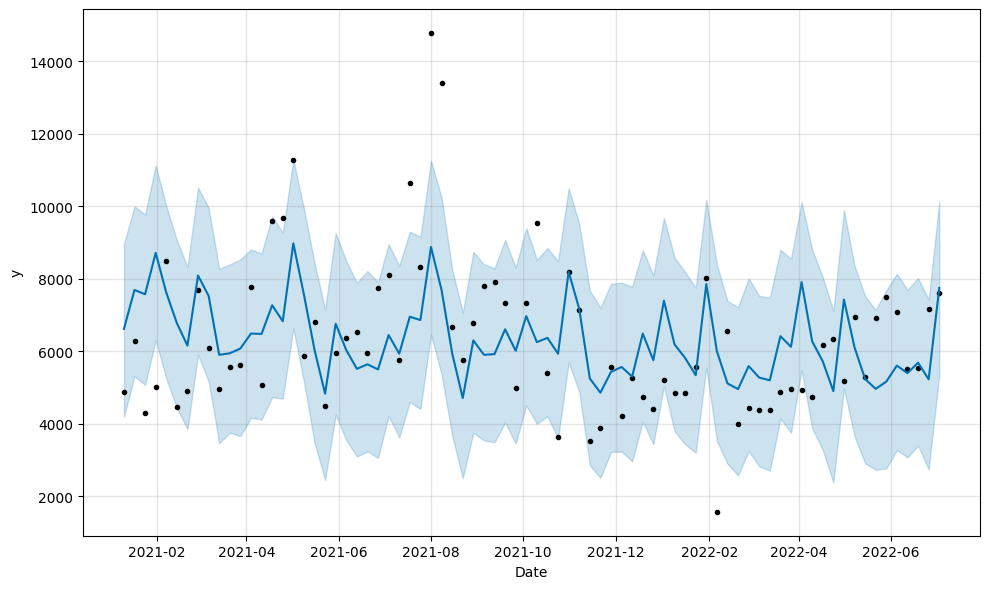

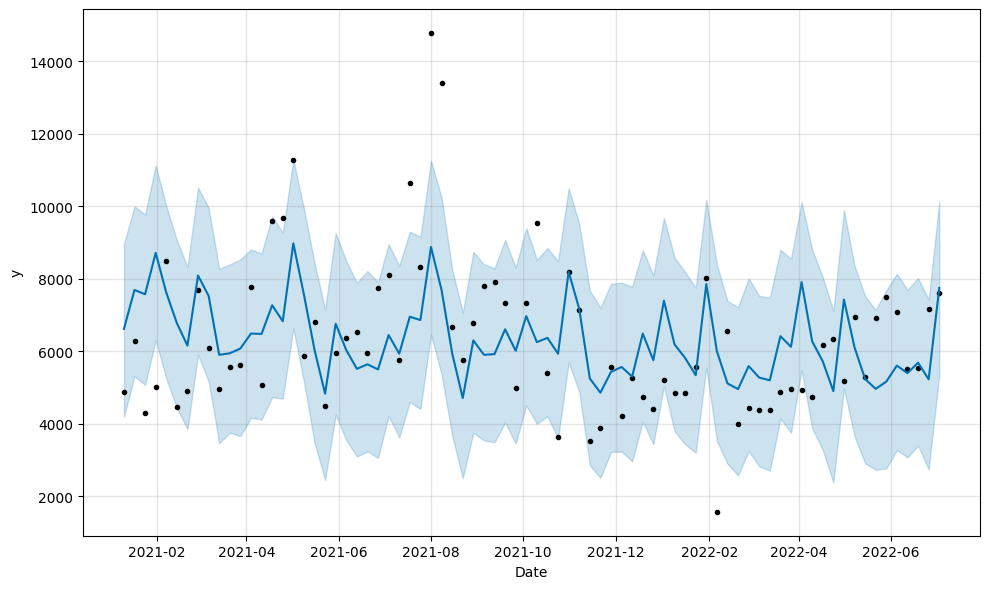

In [357]:
m.plot(forecast, xlabel='Date')